# Midterm 
# Sha Liu

## Section 1

In this section, we will use `openflights_usa.edges`. It is a network of air transportation in the US. You could find it in **Canvas** `Files/Datasets/folder`. 



In [1]:
%matplotlib inline
import networkx as nx

Name: 
Type: Graph
Number of nodes: 546
Number of edges: 2781
Average degree:  10.1868


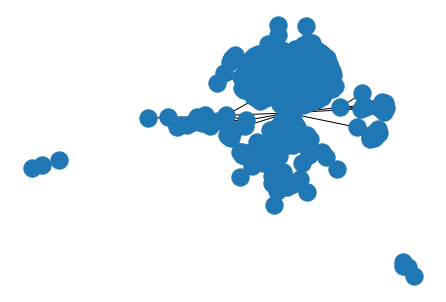

In [2]:
G = nx.read_edgelist('data/openflights_usa.edges')
print(nx.info(G))
nx.draw(G)

### Q1. Is the network a tree? Please respond by using exclusively the number of nodes and links. 

In [3]:
nx.is_tree(G)

False

This network is not a tree.

### Q2.  Which airports have the largest degree, betweenness and clustering coefficient respectively?



In [4]:
highest_degree_node = max(G.nodes, key=G.degree)
print("The airport has the largest degree is", highest_degree_node)

The airport has the largest degree is ATL


In [5]:
betweenness = nx.centrality.betweenness_centrality(G)
highest_betweenness_node = max(G.nodes, key=betweenness.get)
print("The airport has the largest betweenness is", highest_betweenness_node)

The airport has the largest betweenness is ANC


In [6]:
clustering_coe = nx.clustering(G)
highest_clustering_node = max(G.nodes, key = clustering_coe.get)
print("The airport has the largest clustering coefficient is", highest_clustering_node)

The airport has the largest clustering coefficient is MFR


### Q3. Which link has the largest neighborhood overlap? Please use the measure introduced when we discussed Granovetter's principle.



In [7]:
# Based on Granovetter's principle, neighborhood overlap of A and B is calculated by 
# the number of shared neighbors of A and B divide by number of neighbirs of at least one of A or B
# Define neighborhood overlap

def neighborhood_overlap(G, u, v):
    common_neighbors = set(G.neighbors(u)).intersection(set(G.neighbors(v)))
    total_neighbors = set(G.neighbors(u)).union(set(G.neighbors(v)))
    if u in total_neighbors and v in total_neighbors:
        total_neighbors.remove(u)
        total_neighbors.remove(v)
    return (u, v, len(common_neighbors)/(len(total_neighbors)))

In [8]:
from itertools import combinations
nodes = [n for n in G.nodes()] 
pair_jaccard = [neighborhood_overlap(G, pair[0], pair[1]) for pair in combinations(nodes, 2)]
max_jaccard_pairs = max(pair_jaccard, key=lambda x: x[2])
print("The link has the largest neighborhood overlap and its neighborhood overlap value are",max_jaccard_pairs)

The link has the largest neighborhood overlap and its neighborhood overlap value are ('RDD', 'CIC', 1.0)


### Q4. Verify the friendship paradox holds for this network



Firstly, we calcuate the average number of friends an individual has, namely the average degree of the network ; and then we get the average amount of friends of a friend of the individual, in other words, the average degree of the neighbor nodes. Finally, the second value should be no less than the first value.

In [9]:
import statistics
degree_sequence = [G.degree(n) for n in G.nodes]

mean_deg = statistics.mean(degree_sequence)
avg_neigh_deg = 0
for node in G.nodes():
    neigh_deg = 0
    for neigh in G.neighbors(node):
        neigh_deg += (G.degree(neigh))
    avg_neigh_deg += (neigh_deg/len(list(G.neighbors(node))))
avg_neigh_deg = avg_neigh_deg/len(G.nodes)
print(f'The average degree of network is {mean_deg}')
print(f'the average degree of the neighbor nodes is {avg_neigh_deg}')

The average degree of network is 10.186813186813186
the average degree of the neighbor nodes is 64.04614431282478


The average degree of neighbor nodes is larger than average degree of the network, so it verified that the firenship paradox holds for this network

### Q5. Compute the robustness plots for this network for the cases of attacks based on degree, clustering coefficient and betweenness. Which of the three strategies is the most effective to disrupt the network?
hint:
1. you will need to show one plot including three curves corresponding to attacks based on degree, clustering coefficient and betweenness. 
2. compare the three and select the most effective strategy. 




In [10]:
# 1. Attacks based on degree

N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed_1 = range(0, N, M)
C = G.copy()
targeted_attack_core_proportions_1 = []
for nodes_removed in num_nodes_removed_1:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions_1.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

In [11]:
# 2. Attacks based on clustering coefficient

N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed_2 = range(0, N, M)
C = G.copy()
targeted_attack_core_proportions_2 = []
for nodes_removed in num_nodes_removed_2:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions_2.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if C.number_of_nodes() > M:
        clustering_coe = nx.clustering(G)
        nodes_sorted_by_clustering_coefficient = sorted(C.nodes, key=clustering_coe.get, reverse=True)
        nodes_to_remove = nodes_sorted_by_clustering_coefficient[:M]
        C.remove_nodes_from(nodes_to_remove)

In [12]:
# 3. Attacks based betweenness

N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed_3 = range(0, N, M)
C = G.copy()
targeted_attack_core_proportions_3 = []
for nodes_removed in num_nodes_removed_3:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions_3.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if C.number_of_nodes() > M:
        betweenness = nx.centrality.betweenness_centrality(G)
        nodes_sorted_by_betweenness = sorted(C.nodes, key=betweenness.get, reverse=True)
        nodes_to_remove = nodes_sorted_by_betweenness[:M]
        C.remove_nodes_from(nodes_to_remove)

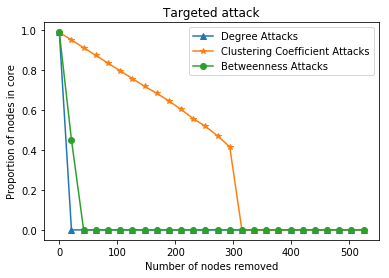

In [13]:
import matplotlib.pyplot as plt

plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed_1, targeted_attack_core_proportions_1, marker='^', label='Degree Attacks')
plt.plot(num_nodes_removed_2, targeted_attack_core_proportions_2, marker='*', label='Clustering Coefficient Attacks')
plt.plot(num_nodes_removed_3, targeted_attack_core_proportions_3, marker='o', label='Betweenness Attacks')
plt.legend()

Based on the graph above, we can see that targeted attackes based on degree is the most effective method.

## Section 2

In this section, please load `retweet-digraph.edges` from **Canvas** `Files/Datasets`. Please read it as a directed and weighted network.   



### Q6. Plot the in-degree and the out-degree distributions

In [14]:
G = nx.read_weighted_edgelist('data/retweet-digraph.edges',create_using=nx.DiGraph)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 18470
Number of edges: 48365
Average in degree:   2.6186
Average out degree:   2.6186


Text(0, 0.5, 'Count')

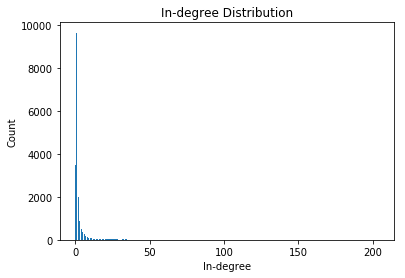

In [15]:
# Plot the in-degree distribution

from collections import Counter
in_degree_sequence = [G.in_degree(n) for n in G.nodes]
in_degree_counts = Counter(in_degree_sequence)
plt.bar(in_degree_counts.keys(), in_degree_counts.values())
plt.title('In-degree Distribution')
plt.xlabel('In-degree')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

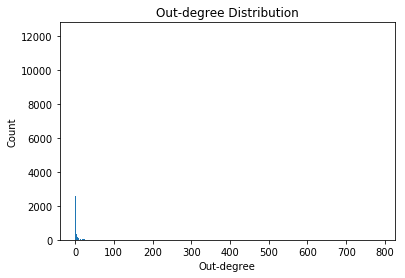

In [16]:
# Plot the out-degree distribution

out_degree_sequence = [G.out_degree(n) for n in G.nodes]
out_degree_counts = Counter(out_degree_sequence)
plt.bar(out_degree_counts.keys(), out_degree_counts.values())
plt.title('Out-degree Distribution')
plt.xlabel('Out-degree')
plt.ylabel('Count')

### Q7.  What is the heterogeneity parameter for the in-degree and the out-degree distributions? Which distribution is more heterogeneous?



In [17]:
# Per fomuala listed in Slides Feb18-23 page 36, heterogeneity parameter is calculated as below:

# First, get the mean of in-degree
mean_in_degree = statistics.mean(in_degree_sequence)

# Secondly, get the sum of the squared in-degrees and then take the average
squared_in_degree = []
for i in in_degree_sequence:
    sq = i**2
    squared_in_degree.append(sq)
avg_squared_in_degree = sum(squared_in_degree)/len(in_degree_sequence)
avg_squared_in_degree

# Finally, divided the mean degree by average squared in-degree
in_degree_heterogeneity_parameter = avg_squared_in_degree/(mean_in_degree**2)
print("The heterogeneity parameter for the in-degree distributions is", in_degree_heterogeneity_parameter)

The heterogeneity parameter for the in-degree distributions is 8.298195705450587


In [18]:
# First, get the mean of out-degree
mean_out_degree = statistics.mean(out_degree_sequence)

# Secondly, get the sum of the squared out-degrees and then take the average
squared_out_degree = []
for i in out_degree_sequence:
    sq = i**2
    squared_out_degree.append(sq)
avg_squared_out_degree = sum(squared_out_degree)/len(out_degree_sequence)
avg_squared_out_degree

# Finally, divided the mean degree by average squared out-degree
out_degree_heterogeneity_parameter = avg_squared_out_degree/(mean_out_degree**2)
print("The heterogeneity parameter for the out-degree distributions is", out_degree_heterogeneity_parameter)

The heterogeneity parameter for the out-degree distributions is 31.02230399802904


Therefore, the heterogeneity parameter for the out-degree distributions is more heterogeneous as it is larger.

### Q8. Plot the in-strength and out-strength distributions

Text(0, 0.5, 'Count')

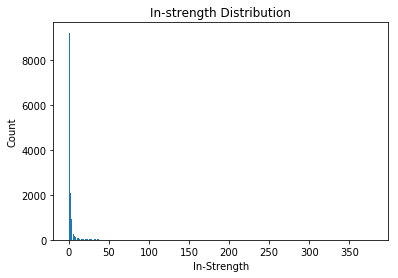

In [19]:
# Plot in-strength distribution

in_strength_list = []
for i in G.nodes:
    in_strength = G.in_degree(i, weight = 'weight')
    in_strength_list.append(in_strength)
in_strength_counts = Counter(in_strength_list)

plt.bar(in_strength_counts.keys(), in_strength_counts.values())
plt.title('In-strength Distribution')
plt.xlabel('In-Strength')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

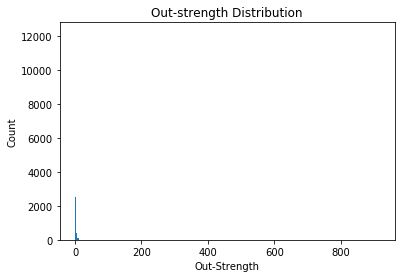

In [20]:
# Plot out-strength distribution

out_strength_list = []
for i in G.nodes:
    out_strength = G.out_degree(i, weight = 'weight')
    out_strength_list.append(out_strength)
out_strength_counts = Counter(out_strength_list)

plt.bar(out_strength_counts.keys(), out_strength_counts.values())
plt.title('Out-strength Distribution')
plt.xlabel('Out-Strength')
plt.ylabel('Count')

### Q9.  Pearson correlation between the in-degree and the PageRank of (all) nodes



In [21]:
import scipy.stats
PR_dict = nx.pagerank(G)

# PageRank list
PR_sequence = list(PR_dict.values())

# In-degree list
in_degree_sequence = [G.in_degree(n) for n in G.nodes]

print("Pearson correlation between the in-degree and the PageRank of (all) nodes is", scipy.stats.pearsonr(in_degree_sequence, PR_sequence)[0])

Pearson correlation between the in-degree and the PageRank of (all) nodes is 0.8337955545635974


## Section 3

Please load the dataset `karate_club.graphml` from **Canvas** `Files/Datasets`. Each node in this graph has a 'club' attribute, indicating whether the member followed the instructor (Mr. Hi) or the president (Officer).  






### Q10. Compute the expected number of links between members of the two groups and within each group, if links can be placed at random



Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


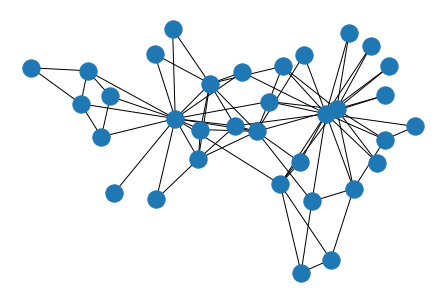

In [22]:
G = nx.read_graphml('data/karate_club.graphml')
print(nx.info(G))
nx.draw(G)

In [23]:
# First, we compute the each club's proportion

def instructor_percent(G):
    instructor = 0
    for n in G.nodes:
        if G.nodes[n]['club'] == 'Mr. Hi':
            instructor += 1
    return instructor/G.number_of_nodes()

print("Instructor proportion is", instructor_percent(G))

def president_percent(G):
    president = 0
    for n in G.nodes:
        if G.nodes[n]['club'] == 'Officer':
            president += 1
    return president/G.number_of_nodes()

print("President proportion is", president_percent(G))

Instructor proportion is 0.5
President proportion is 0.5


In [24]:
# If the links can be placed at random:

# Then we compute how many instructor-instructor edges would we expect
print("The expexted instructor-instructor edges are", int(round((instructor_percent(G)**2) * G.number_of_edges())))

# Then we compute how many president-president edges would we expect
print("The expexted president-president edges are", int(round((president_percent(G)**2) * G.number_of_edges())))

# Then we compute how many instructor-president edges would we expect
print("The expexted president-instructor edges are", int(round((president_percent(G)*instructor_percent(G)*2*G.number_of_edges()))))

The expexted instructor-instructor edges are 20
The expexted president-president edges are 20
The expexted president-instructor edges are 39


### Q11. Compute the actual number of edges between and within the groups,  and state whether there is evidence of homophily



In [25]:
# Firstly, we compute the actual number of instructor-instructor edges
def instructor_instructor_edges(G):
    count = 0
    for u, v in G.edges:
        if G.nodes[u]['club'] == 'Mr. Hi'and G.nodes[v]['club'] == 'Mr. Hi':
                count += 1
    return count
print("The actual instructor-instructor edges are", instructor_instructor_edges(G))

# Secondly, we compute the actual number of president-president edges
def president_president_edges(G):
    count = 0
    for u, v in G.edges:
        if G.nodes[u]['club'] == 'Officer'and G.nodes[v]['club'] == 'Officer':
                count += 1
    return count
print("The actual president-president edges are", president_president_edges(G))

# Finally, we compute the actual number of president-officer edges
def president_officer_edges(G):
    count = 0
    for u, v in G.edges:
        if (G.nodes[u]['club'] == 'Officer'and G.nodes[v]['club'] == 'Mr. Hi') or (G.nodes[u]['club'] == 'Mr. Hi'and G.nodes[v]['club'] == 'Officer'):
                count += 1
    return count
print("The actual president-officer edges are", president_officer_edges(G))

The actual instructor-instructor edges are 35
The actual president-president edges are 32
The actual president-officer edges are 11


The actual number of president-instructor edges is significantly less than the expected president-instructor edges (2pq) as 11 is less than 39, therefore there is evidence of homophily.